## Import Necessaries Libraries

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai nbdev plum-dispatch evaluate seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.6 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/msi1427/blurr
%cd blurr

Cloning into 'blurr'...
remote: Enumerating objects: 5063, done.
remote: Counting objects: 100% (894/894), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 5063 (delta 705), reused 702 (delta 576), pack-reused 4169 (from 1)
Receiving objects: 100% (5063/5063), 26.85 MiB | 30.79 MiB/s, done.
Resolving deltas: 100% (3934/3934), done.
/content/blurr


In [ ]:
#Import Necessaries libraries
import pandas as pd
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

## Data

In [ ]:
%cd /content/drive/MyDrive/Data Science/Mastercourse cohort 7/Patent CPC Code Classifier

/content/drive/MyDrive/Data Science/Mastercourse cohort 7/Patent CPC Code Classifier


In [ ]:
#Load Dataset
df = pd.read_csv('data/processed/processed_patent_details.csv')

In [ ]:
df

,publication_number,title,abstract,cpc_codes
0,CN110543639B,An English sentence simplification algorithm based on pre-trained Transformer language model,"The invention discloses an English sentence simplification algorithm based on a pre-training transducer language model, which comprises the following steps: step 1, counting word frequency by using the disclosed wikipedia corpus; step 2, utilizing a disclosed pre-trained word embedding model to obtain vectorized expression of words; step 3, preprocessing sentences to be simplified to obtain content words; step 4, obtaining a candidate substituted word set of the content word in the sentence by using a published pre-training transducer language model Bert; step 5, sequencing the candidate a...","['G06F18/22', 'Y02D10/00']"
1,US11532378B2,Protein database search using learned representations,"A method for efficient search of protein sequence databases for proteins that have sequence, structural, and/or functional homology with respect to information derived from a search query. The method involves transforming the protein sequences into vector representations and searching in a vector space. Given a database of protein sequences and a learned embedding model, the embedding model is applied to each amino acid sequence to transform it into a sequence of vector representations. A query sequence is also transformed into a sequence of vector representations, preferably using the sam...","['G06N3/084', 'G06F16/2255', 'G06F16/24534', 'G06N3/044', 'G06N3/0445', 'G06N3/08', 'G16B30/10', 'G16B40/20', 'G06N3/045', 'G06N3/047']"
2,US11961511B2,System and method for disambiguation and error resolution in call transcripts,"A system and method for detecting and resolving mis-transcriptions in a transcript generated by an automatic speech recognition system when transcribing spoken words. The system and method receive a machine language generated transcript of a speech signal by at least one of a first machine learning system and a second machine learning system, and analyze the machine language generated transcript to find a region of low confidence indicative of a mis-transcription and predict an improvement to the region of low confidence indicative of the mis-transcription. The system and method select a r...","['G10L15/32', 'G10L15/16', 'G06F40/279', 'G10L15/183', 'G10L15/26']"
3,US20210365643A1,Natural language outputs for path prescriber model simulation for nodes in a time-series network,"A method of generating natural language outputs may include accessing a model of a system, where the system may be represented by a hierarchy of nodes in a data structure, and nodes in the hierarchy of nodes may include time series of data. The method may also include identifying a time series represented by a node in the data structure that will generate a future anomaly; accessing a template corresponding to a type of the time series; populating semantic tags in the template using data from the time series; sending a phrase from the template to a natural language model; receiving a plura...","['G06F7/24', 'G06F40/56', 'G06F16/3326', 'G06F16/3329', 'G06F16/3344', 'G06F40/186', 'G06F40/247', 'G06F40/30', 'G06F40/35', 'G06N20/00', 'G06N3/045', 'G06N3/08', 'G06N5/01', 'G06Q30/0201']"
4,US12327085B2,Sentence similarity scoring using neural network distillation,The disclosure herein describes a system and method for attentive sentence similarity scoring. A distilled sentence embedding (DSE) language model is trained by decoupling a transformer language model using knowledge distillation. The trained DSE language model calculates sentence embeddings for a plurality of candidate sentences for sentence similarity comparisons. An embedding component associated with the trained DSE language model generates a plurality of candidate sentence representations representing each candidate sentence in the plurality of candidate sentences which are stored for...,"['G06F40/30', 'G06F40/284', 'G06F16/34', 'G06N3/045', '

In [ ]:
df = df[['abstract', 'cpc_codes']]
df.head()

,abstract,cpc_codes
0,"The invention discloses an English sentence simplification algorithm based on a pre-training transducer language model, which comprises the following steps: step 1, counting word frequency by using the disclosed wikipedia corpus; step 2, utilizing a disclosed pre-trained word embedding model to obtain vectorized expression of words; step 3, preprocessing sentences to be simplified to obtain content words; step 4, obtaining a candidate substituted word set of the content word in the sentence by using a published pre-training transducer language model Bert; step 5, sequencing the candidate a...","['G06F18/22', 'Y02D10/00']"
1,"A method for efficient search of protein sequence databases for proteins that have sequence, structural, and/or functional homology with respect to information derived from a search query. The method involves transforming the protein sequences into vector representations and searching in a vector space. Given a database of protein sequences and a learned embedding model, the embedding model is applied to each amino acid sequence to transform it into a sequence of vector representations. A query sequence is also transformed into a sequence of vector representations, preferably using the sam...","['G06N3/084', 'G06F16/2255', 'G06F16/24534', 'G06N3/044', 'G06N3/0445', 'G06N3/08', 'G16B30/10', 'G16B40/20', 'G06N3/045', 'G06N3/047']"
2,"A system and method for detecting and resolving mis-transcriptions in a transcript generated by an automatic speech recognition system when transcribing spoken words. The system and method receive a machine language generated transcript of a speech signal by at least one of a first machine learning system and a second machine learning system, and analyze the machine language generated transcript to find a region of low confidence indicative of a mis-transcription and predict an improvement to the region of low confidence indicative of the mis-transcription. The system and method select a r...","['G10L15/32', 'G10L15/16', 'G06F40/279', 'G10L15/183', 'G10L15/26']"
3,"A method of generating natural language outputs may include accessing a model of a system, where the system may be represented by a hierarchy of nodes in a data structure, and nodes in the hierarchy of nodes may include time series of data. The method may also include identifying a time series represented by a node in the data structure that will generate a future anomaly; accessing a template corresponding to a type of the time series; populating semantic tags in the template using data from the time series; sending a phrase from the template to a natural language model; receiving a plura...","['G06F7/24', 'G06F40/56', 'G06F16/3326', 'G06F16/3329', 'G06F16/3344', 'G06F40/186', 'G06F40/247', 'G06F40/30', 'G06F40/35', 'G06N20/00', 'G06N3/045', 'G06N3/08', 'G06N5/01', 'G06Q30/0201']"
4,The disclosure herein describes a system and method for attentive sentence similarity scoring. A distilled sentence embedding (DSE) language model is trained by decoupling a transformer language model using knowledge distillation. The trained DSE language model calculates sentence embeddings for a plurality of candidate sentences for sentence similarity comparisons. An embedding component associated with the trained DSE language model generates a plurality of candidate sentence representations representing each candidate sentence in the plurality of candidate sentences which are stored for...,"['G06F40/30', 'G06F40/284', 'G06F16/34', 'G06N3/045', 'G06N3/08', 'G06N3/048']"


In [ ]:
df.describe(include='object')

,abstract,cpc_codes
count,32173,32173
unique,29804,30227
top,"A security platform architecture is described herein. A user identity platform architecture which uses a multitude of biometric analytics to create an identity token unique to an individual human. This token is derived on biometric factors like human behaviors, motion analytics, human physical characteristics like facial patterns, voice recognition prints, usage of device patterns, user location actions and other human behaviors which can derive a token or be used as a dynamic password identifying the unique individual with high calculated confidence. Because of the dynamic nature and the ...",[]
freq,22,496


In [ ]:
df.shape

(32173, 2)

In [ ]:
#count cpc_code
count_cpc = {}
for cpc_code_list in df.cpc_codes:
  cpc_code_list = eval(cpc_code_list)
  for cpc_code in cpc_code_list:
    if cpc_code in count_cpc.keys():
      count_cpc[cpc_code] += 1
    else:
      count_cpc[cpc_code] = 1

In [ ]:
print(len(count_cpc))
print(count_cpc)

28021
{'G06F18/22': 697, 'Y02D10/00': 655, 'G06N3/084': 3224, 'G06F16/2255': 31, 'G06F16/24534': 26, 'G06N3/044': 2947, 'G06N3/0445': 397, 'G06N3/08': 6777, 'G16B30/10': 62, 'G16B40/20': 220, 'G06N3/045': 7671, 'G06N3/047': 1678, 'G10L15/32': 76, 'G10L15/16': 422, 'G06F40/279': 389, 'G10L15/183': 153, 'G10L15/26': 585, 'G06F7/24': 9, 'G06F40/56': 295, 'G06F16/3326': 25, 'G06F16/3329': 619, 'G06F16/3344': 399, 'G06F40/186': 143, 'G06F40/247': 116, 'G06F40/30': 1988, 'G06F40/35': 531, 'G06N20/00': 6131, 'G06N5/01': 1363, 'G06Q30/0201': 292, 'G06F40/284': 709, 'G06F16/34': 26, 'G06N3/048': 1291, 'G06F16/367': 350, 'G06F16/24522': 108, 'G06F16/36': 91, 'G06F16/248': 285, 'G06F16/338': 114, 'G06F16/9024': 502, 'G06F16/90332': 243, 'G06F16/9038': 121, 'G06F16/93': 160, 'G06N5/022': 1102, 'G06N5/04': 1340, 'G06V30/414': 105, 'G06N3/0464': 3497, 'G06N3/09': 3818, 'G06N5/046': 390, 'G10L15/1815': 330, 'A61B5/0077': 118, 'A61B5/1107': 4, 'A61B5/1114': 38, 'A61B5/1128': 66, 'A61B5/163': 62, 'A61B

In [ ]:
#find the rare CPC code based on threshold
threshold = len(df) * 0.01
rare_cpc = [ cpc for cpc, _ in count_cpc.items() if count_cpc[cpc] < threshold]
print(f'Total rare_cpc : {len(rare_cpc)}')
print(rare_cpc)

Total rare_cpc : 27892
['G06F16/2255', 'G06F16/24534', 'G16B30/10', 'G16B40/20', 'G10L15/32', 'G10L15/183', 'G06F7/24', 'G06F40/56', 'G06F16/3326', 'G06F40/186', 'G06F40/247', 'G06Q30/0201', 'G06F16/34', 'G06F16/24522', 'G06F16/36', 'G06F16/248', 'G06F16/338', 'G06F16/90332', 'G06F16/9038', 'G06F16/93', 'G06V30/414', 'A61B5/0077', 'A61B5/1107', 'A61B5/1114', 'A61B5/1128', 'A61B5/163', 'A61B5/165', 'A61B5/4803', 'G06F18/24133', 'G06V20/41', 'G06V40/16', 'G06V40/168', 'G10L25/57', 'G10L25/63', 'G10L25/90', 'G06T2207/30201', 'G06F18/2155', 'G06K9/6259', 'G10L15/065', 'G06F40/166', 'G06F16/345', 'H04M2203/2061', 'H04M3/5183', 'G06F16/316', 'G06F16/3347', 'G16H70/60', 'G06F40/237', 'G06F21/1015', 'G06F21/32', 'G06F40/137', 'G06F40/169', 'G06F21/105', 'G06V10/803', 'G06V10/806', 'G16H10/20', 'G16H15/00', 'G06V2201/03', 'G06F40/20', 'G06F40/103', 'G06V20/70', 'G06F40/10', 'G06F40/126', 'G06T9/00', 'G06V10/74', 'G06F40/151', 'G06F3/04845', 'G06Q50/184', 'G06F16/3334', 'G10L15/197', 'G10L13/02'

In [ ]:
revised_cpc_codes_full_list = []
cpc_code_series_list = df.cpc_codes.to_list()

for cpc_code_list in df.cpc_codes:
  cpc_code_list = eval(cpc_code_list)
  revised_cpc_codes = []
  for cpc_code in cpc_code_list:
    if cpc_code not in rare_cpc:
      revised_cpc_codes.append(cpc_code)

  if len(revised_cpc_codes) == 0:
    revised_cpc_codes_full_list.append(None)  # Append None for rows to be dropped
  else:
    revised_cpc_codes_full_list.append(revised_cpc_codes)

df['revised_cpc_codes'] = revised_cpc_codes_full_list
df = df.dropna(subset=['revised_cpc_codes']).reset_index(drop=True) # Drop rows with None in revised_cpc_codes
df

,abstract,cpc_codes,revised_cpc_codes
0,"The invention discloses an English sentence simplification algorithm based on a pre-training transducer language model, which comprises the following steps: step 1, counting word frequency by using the disclosed wikipedia corpus; step 2, utilizing a disclosed pre-trained word embedding model to obtain vectorized expression of words; step 3, preprocessing sentences to be simplified to obtain content words; step 4, obtaining a candidate substituted word set of the content word in the sentence by using a published pre-training transducer language model Bert; step 5, sequencing the candidate a...","['G06F18/22', 'Y02D10/00']","[G06F18/22, Y02D10/00]"
1,"A method for efficient search of protein sequence databases for proteins that have sequence, structural, and/or functional homology with respect to information derived from a search query. The method involves transforming the protein sequences into vector representations and searching in a vector space. Given a database of protein sequences and a learned embedding model, the embedding model is applied to each amino acid sequence to transform it into a sequence of vector representations. A query sequence is also transformed into a sequence of vector representations, preferably using the sam...","['G06N3/084', 'G06F16/2255', 'G06F16/24534', 'G06N3/044', 'G06N3/0445', 'G06N3/08', 'G16B30/10', 'G16B40/20', 'G06N3/045', 'G06N3/047']","[G06N3/084, G06N3/044, G06N3/0445, G06N3/08, G06N3/045, G06N3/047]"
2,"A system and method for detecting and resolving mis-transcriptions in a transcript generated by an automatic speech recognition system when transcribing spoken words. The system and method receive a machine language generated transcript of a speech signal by at least one of a first machine learning system and a second machine learning system, and analyze the machine language generated transcript to find a region of low confidence indicative of a mis-transcription and predict an improvement to the region of low confidence indicative of the mis-transcription. The system and method select a r...","['G10L15/32', 'G10L15/16', 'G06F40/279', 'G10L15/183', 'G10L15/26']","[G10L15/16, G06F40/279, G10L15/26]"
3,"A method of generating natural language outputs may include accessing a model of a system, where the system may be represented by a hierarchy of nodes in a data structure, and nodes in the hierarchy of nodes may include time series of data. The method may also include identifying a time series represented by a node in the data structure that will generate a future anomaly; accessing a template corresponding to a type of the time series; populating semantic tags in the template using data from the time series; sending a phrase from the template to a natural language model; receiving a plura...","['G06F7/24', 'G06F40/56', 'G06F16/3326', 'G06F16/3329', 'G06F16/3344', 'G06F40/186', 'G06F40/247', 'G06F40/30', 'G06F40/35', 'G06N20/00', 'G06N3/045', 'G06N3/08', 'G06N5/01', 'G06Q30/0201']","[G06F16/3329, G06F16/3344, G06F40/30, G06F40/35, G06N20/00, G06N3/045, G06N3/08, G06N5/01]"
4,The disclosure herein describes a system and method for attentive sentence similarity scoring. A distilled sentence embedding (DSE) language model is trained by decoupling a transformer language model using knowledge distillation. The trained DSE language model calculates sentence embeddings for a plurality of candidate sentences for sentence similarity comparisons. An embedding component associated with the trained DSE language model generates a plurality of candidate sentence representations representing each candidate sentence in the plurality of candidate sentences which are stored for...,"['G06F40/30', 'G06F40/284', 'G06F16/34', 'G06N3/045', 'G06N3/08', 'G06N3/048']","[G06F40/30, G06F40/284, G06N3/045, G06N3/08, G06N3/048]"
...,...,...,...
23937,"A method, computer readable medium, and system are disclosed for computing a path for a user to move along within a physical spac

In [ ]:
df.shape

(23942, 3)

In [ ]:
#count revised cpc codes
count_revised_cpc = {}
for cpc_code_list in df.revised_cpc_codes:
  for cpc_code in cpc_code_list:
    if cpc_code in count_revised_cpc.keys():
      count_revised_cpc[cpc_code] += 1
    else:
      count_revised_cpc[cpc_code] = 1

print(f'No of revised cpc code {len(count_revised_cpc)}')
print(count_revised_cpc)

No of revised cpc code 129
{'G06F18/22': 697, 'Y02D10/00': 655, 'G06N3/084': 3224, 'G06N3/044': 2947, 'G06N3/0445': 397, 'G06N3/08': 6777, 'G06N3/045': 7671, 'G06N3/047': 1678, 'G10L15/16': 422, 'G06F40/279': 389, 'G10L15/26': 585, 'G06F16/3329': 619, 'G06F16/3344': 399, 'G06F40/30': 1988, 'G06F40/35': 531, 'G06N20/00': 6131, 'G06N5/01': 1363, 'G06F40/284': 709, 'G06N3/048': 1291, 'G06F16/367': 350, 'G06F16/9024': 502, 'G06N5/022': 1102, 'G06N5/04': 1340, 'G06N3/0464': 3497, 'G06N3/09': 3818, 'G06N5/046': 390, 'G10L15/1815': 330, 'A61B5/7267': 449, 'G06N20/10': 1107, 'G06N3/04': 1703, 'G06N3/0455': 1614, 'G06T7/70': 430, 'G10L15/22': 961, 'G06N20/20': 1449, 'G06T2207/10016': 615, 'G06T2207/20081': 2236, 'G06T2207/20084': 2233, 'G10L2015/223': 484, 'G10L15/063': 405, 'G06F18/2413': 365, 'G06F40/295': 532, 'G06F16/35': 418, 'G06Q10/10': 368, 'G06N3/088': 1599, 'G06F40/40': 458, 'G06V10/82': 2523, 'G16H30/40': 637, 'G06V10/774': 684, 'G16H50/20': 1294, 'G06F30/27': 388, 'G06F40/216': 419,

In [ ]:
#encode
encode_revised_cpc_codes = { key : idx for idx, (key, value) in enumerate(count_revised_cpc.items())}
with open('data/encode_revised_cpc_codes.json', 'w') as f:
  json.dump(encode_revised_cpc_codes, f)

In [ ]:
#categorize the revised CPC codes
encode_revised_cpc_codes_full_list = []
for cpc_code_list in df.revised_cpc_codes:
  encode_revised_cpc_codes_list = [0] * len(encode_revised_cpc_codes)
  for cpc_code in cpc_code_list:
    index_of_encode_cpc = encode_revised_cpc_codes[cpc_code]
    encode_revised_cpc_codes_list[index_of_encode_cpc] = 1

  encode_revised_cpc_codes_full_list.append(encode_revised_cpc_codes_list)

df['cpc_codes_cat'] = encode_revised_cpc_codes_full_list
df

,abstract,cpc_codes,revised_cpc_codes,cpc_codes_cat
0,"The invention discloses an English sentence simplification algorithm based on a pre-training transducer language model, which comprises the following steps: step 1, counting word frequency by using the disclosed wikipedia corpus; step 2, utilizing a disclosed pre-trained word embedding model to obtain vectorized expression of words; step 3, preprocessing sentences to be simplified to obtain content words; step 4, obtaining a candidate substituted word set of the content word in the sentence by using a published pre-training transducer language model Bert; step 5, sequencing the candidate a...","['G06F18/22', 'Y02D10/00']","[G06F18/22, Y02D10/00]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,"A method for efficient search of protein sequence databases for proteins that have sequence, structural, and/or functional homology with respect to information derived from a search query. The method involves transforming the protein sequences into vector representations and searching in a vector space. Given a database of protein sequences and a learned embedding model, the embedding model is applied to each amino acid sequence to transform it into a sequence of vector representations. A query sequence is also transformed into a sequence of vector representations, preferably using the sam...","['G06N3/084', 'G06F16/2255', 'G06F16/24534', 'G06N3/044', 'G06N3/0445', 'G06N3/08', 'G16B30/10', 'G16B40/20', 'G06N3/045', 'G06N3/047']","[G06N3/084, G06N3/044, G06N3/0445, G06N3/08, G06N3/045, G06N3/047]","[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,"A system and method for detecting and resolving mis-transcriptions in a transcript generated by an automatic speech recognition system when transcribing spoken words. The system and method receive a machine language generated transcript of a speech signal by at least one of a first machine learning system and a second machine learning system, and analyze the machine language generated transcript to find a region of low confidence indicative of a mis-transcription and predict an improvement to the region of low confidence indicative of the mis-transcription. The system and method select a r...","['G10L15/32', 'G10L15/16', 'G06F40/279', 'G10L15/183', 'G10L15/26']","[G10L15/16, G06F40/279, G10L15/26]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,"A method of generating natural language outputs may include accessing a model of a system, where the system may be represented by a hierarchy of nodes in a data structure, and nodes in the hierarchy of nodes may include time series of data. The method may also include identifying a time series represented by a node in the data structure that will generate a future anomaly; accessing a template corresponding to a type of the time series; populating semantic tags in the template using data from the time series; sending a phrase from the template to a natural language model; receiving a plura...","['G06F7/24', 'G06F40/56', 'G06F16/3326', 'G06F16/3329', 'G06F16/3344', 'G06F40/186', 'G06F40/247', 'G06F40/30', 'G06F40/35', 'G06N20/00', 'G06N3/045', 'G06N3/08', 'G06N5/01', 'G06Q30/0201']","[G06F16/3329, G06F16/3344, G06F40/30, G06F40/35

## DataLoaders & Modeling

In [ ]:
labels = list(encode_revised_cpc_codes.keys())

In [ ]:
# For distilroberta-base model
model_name = "distilroberta-base"

In [ ]:
#For bert-base-uncased
model_name = "bert-base-uncased"

In [ ]:
#For roberta-base
model_name = "roberta-base"

In [ ]:
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True, vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('abstract'), get_y=ColReader('cpc_codes_cat'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, f"dataloaders/dls-{model_name}-patent-cpc-classifier.pkl")

In [ ]:
dls.vocab

['G06F18/22', 'Y02D10/00', 'G06N3/084', 'G06N3/044', 'G06N3/0445', 'G06N3/08', 'G06N3/045', 'G06N3/047', 'G10L15/16', 'G06F40/279', 'G10L15/26', 'G06F16/3329', 'G06F16/3344', 'G06F40/30', 'G06F40/35', 'G06N20/00', 'G06N5/01', 'G06F40/284', 'G06N3/048', 'G06F16/367', 'G06F16/9024', 'G06N5/022', 'G06N5/04', 'G06N3/0464', 'G06N3/09', 'G06N5/046', 'G10L15/1815', 'A61B5/7267', 'G06N20/10', 'G06N3/04', 'G06N3/0455', 'G06T7/70', 'G10L15/22', 'G06N20/20', 'G06T2207/10016', 'G06T2207/20081', 'G06T2207/20084', 'G10L2015/223', 'G10L15/063', 'G06F18/2413', 'G06F40/295', 'G06F16/35', 'G06Q10/10', 'G06N3/088', 'G06F40/40', 'G06V10/82', 'G16H30/40', 'G06V10/774', 'G16H50/20', 'G06F30/27', 'G06F40/216', 'G06N5/025', 'G06F40/289', 'G06N3/0454', 'G06V10/764', 'G06N3/006', 'G06F3/0482', 'G06F3/167', 'G06F18/24', 'G06F18/214', 'G06N3/0499', 'G06F21/577', 'G06F21/6245', 'G06K9/6256', 'G06F40/205', 'G06N3/092', 'G06N3/0895', 'G06N3/0442', 'G06N7/01', 'G06F16/9535', 'G06T11/60', 'G06N3/02', 'G06V10/454', 'G0

In [ ]:
model = BaseModelWrapper(hf_model)

acc = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

### Stage 0

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0008317637839354575, valley=0.00019054606673307717)

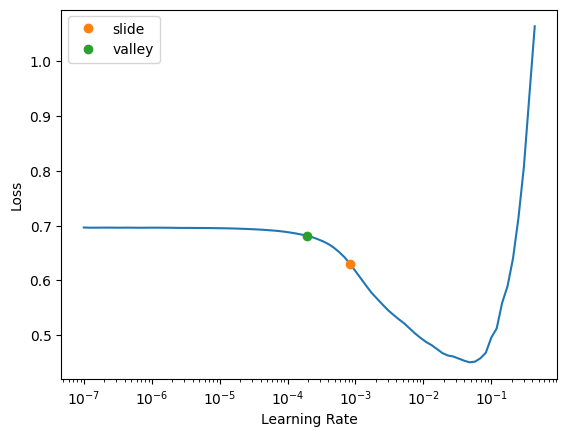

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(2, 0.00019054606673307717)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.141990,0.133028,0.951348,01:03
1,0.127461,0.122435,0.951682,01:03


In [ ]:
#create models path
model_path = Path(f'models/{model_name}')
model_path.mkdir(parents=True, exist_ok=True)

In [ ]:
learner.save(f'{model_name}/{model_name}-patent-cpc-classifier-stage0')
learner.export(f'{model_path}/{model_name}-patent-cpc-classifier-stage0.pkl')

### Stage 1

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.004365158267319202, valley=0.00015848931798245758)

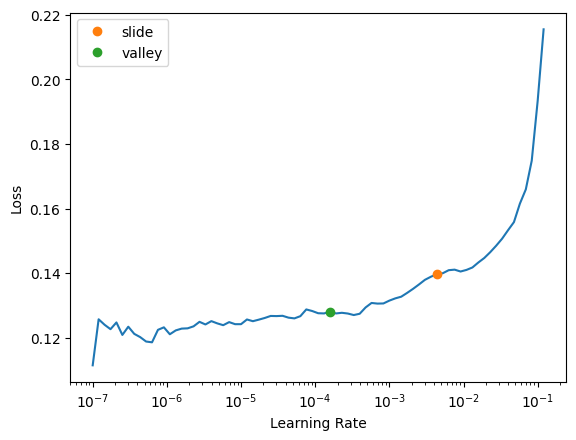

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(3, slice(1e-6, 0.00015848931798245758))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.115375,0.110787,0.953977,01:47
1,0.108768,0.105874,0.952342,01:48
2,0.105571,0.104818,0.949195,01:49


In [ ]:
learner.save(f'{model_name}/{model_name}-patent-cpc-classifier-stage1')
learner.export(f'{model_path}/{model_name}-patent-cpc-classifier-stage1.pkl')